# DS Lab Activity 1.4. Data Sampling Using Python Random Generation Capabilities

In this tutorial we show plenty of ways to generate different types and shapes of data for classification and clustering.

**Learning Outcomes**

1.	Gain familiarity with important sampling and random number generation procedures in numpy
2.	Ability to perform simple and important visualisation in numpy


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(10)
y = np.ones(2)

In [3]:
print(x.shape)
print(x)
print (y)

(10,)
[0 1 2 3 4 5 6 7 8 9]
[1. 1.]


In [4]:
x = x.reshape(2,5)
y = y.reshape(2,1)
y[1] = 2
print(x)
print(y)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[1.]
 [2.]]


In [5]:
x+y

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 7.,  8.,  9., 10., 11.]])

In [6]:
np.zeros((2,5))
np.ones((2,5)).shape


(2, 5)

In [7]:
np.array([0,3]).reshape(2,1)


array([[0],
       [3]])

# How to deal with random number generation

In the exercises below, we show normal (Gaussian) distribution but the methods can be used with any other distribution

## 1. Generating univariate normally distributed numbers (1D data)

Generating N data points from a normal distribution with mean mu and standard deviation of $\sigma$

### 1.1 Generating a set of N normally distributed numbers with mean $\mu$ and std $\sigma$

#### Method1: Efficient

In [8]:
np.random.seed(1) # this is for comparison between different methods

mu, sigma = 1.5, 2.2
N = 200
data  = np.random.normal(mu,sigma,N)

print(data[:5])

[ 5.0735598   0.15413589  0.33802215 -0.86053097  3.40389678]


Create a dataframe that encompasses the data and print the first 5 rows

In [9]:
df    = pd.DataFrame(data)
df.head()

,0
0,5.073560
1,0.154136
2,0.338022
3,-0.860531
4,3.403897


Now visualise the data, note that on the x axis we have the number of data samples

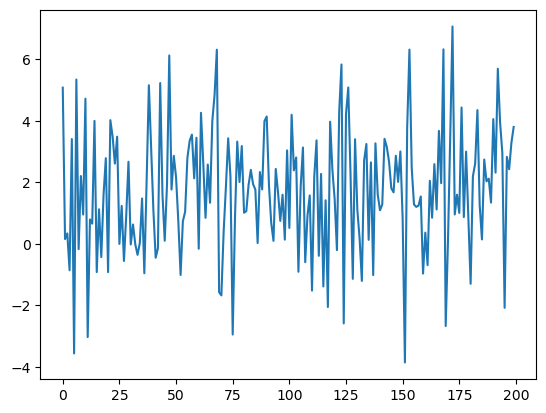

In [10]:
plt.plot(data)

The plot above is a little awkward we normally expect the x axis to have the coordinate. To have the points plotted individually we can use '.' or 'x' or 'o'. Try them, all produce individual points without linking between them. On the other hand, the default is '-' which will connect between the data points. '--' and '-.' also link between the data points but in a dashed and dashed dotted lines.

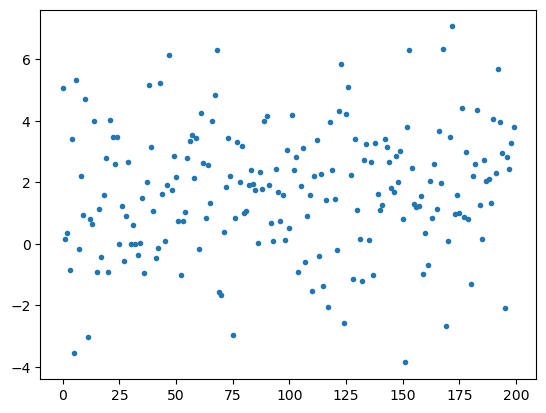

In [11]:
plt.plot(data,'.')

To change the colour we can add a letter that represents it

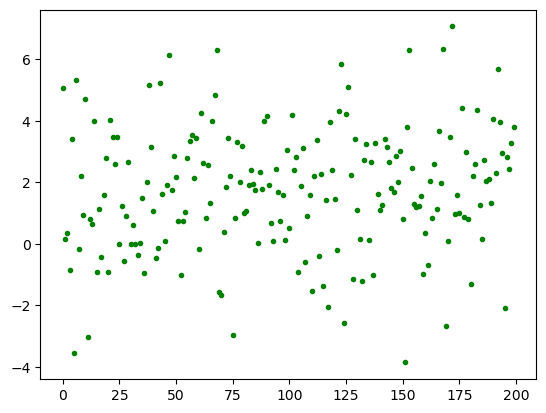

In [12]:
plt.plot(data,'g.')

#### Summary

All together fit as follows

,0
0,0.618068
1,3.312812
2,0.262928
3,5.800732
4,-1.430294


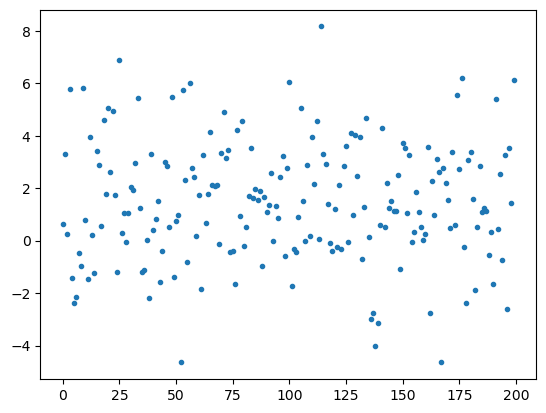

In [13]:
mu, sigma = 1.5, 2.2
N = 200
data  = np.random.normal(mu,sigma,N)
plt.plot(data.T,'.')
df    = pd.DataFrame(data)
df.head()

#### Method 2: Not Efficient

Less efficient way of generating N data points from a normal distribution with mean mu and standard deviation of sigma. This is because if does not benefit from broadcasting in the normal, see https://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

In [14]:
np.random.seed(1) # this is for comparison between different methods
mu, sigma = 1.5, 2.2
N = 200
mus = np.ones((N,1))*mu
sigmas = np.ones((N,1))*sigma
data = np.random.normal(mus,sigmas)
print (data.shape)
#help (np.random.normal)
df = pd.DataFrame(data)
df.head()

(200, 1)


,0
0,5.073560
1,0.154136
2,0.338022
3,-0.860531
4,3.403897


### 1.2. Generating Multiple univariate normal distributions

#### Method 2: Efficient, uses univariate Gaussian

The following produces M different sets of normally distributed points with mean mus[i] and sigmas[i] std, each set contains N samples

,0,1,2,3,4,5,6,7,8,9
0,-0.400878,29.788373,40.759064,47.908073,61.944085,23.575406,36.229322,46.528631,80.008103,66.176098
1,0.824006,30.081731,37.687398,51.194623,60.024666,27.772716,34.747859,44.231948,79.163922,69.727739
2,-0.562305,32.344898,39.676826,51.251710,64.340963,27.238649,35.238351,47.818319,78.935110,71.318502
3,1.954878,28.356799,38.926088,49.928602,57.582919,24.121539,32.936169,46.182162,79.639619,70.337707
4,-1.331952,28.440124,40.309866,51.263493,52.869832,26.553067,36.611192,45.552666,80.488188,69.418616
5,-1.760689,28.486326,39.689565,52.186808,64.171058,25.555197,37.530700,48.674750,78.329659,68.944380
6,-1.650721,30.391492,40.635883,49.116613,61.470284,29.167224,35.691012,43.701562,79.232719,72.296506
7,-0.890556,29.683055,40.427390,51.492518,58.083825,26.943829,36.316518,50.163409,79.032446,71.969598
8,-1.119115,31.554418,38.187079,49.279045,58.018874,22.547518,35.684603,45.494275,79.475963,72.354738
9,1.956079,28.421718,40.520387,51.067461,66.434156,22.748648,36.060706,53.926574,79.220678,72.061632


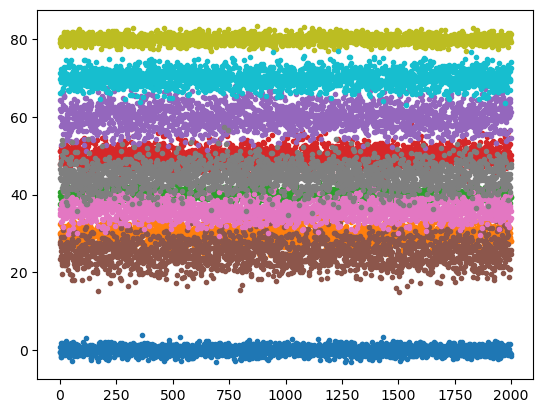

In [15]:

mus = np.array([0,30,40,50,60,  25,36,45,80,70])
sigmas = np.array([1,2,1,2,3,  3,2,3,1,2])
N = 2000
M = len(mus)
data = np.ones((N,M))
for i in range(M):
    data[:,i] = np.random.normal(mus[i],sigmas[i],N)
    plt.plot(data[:,i],'.')
    
df = pd.DataFrame(data)
df.head(10)

#### Method 2: Inefficient, uses univariate Gaussian

This method generates two independent sets of data points that are normally distributed. Instead of producing a 2D distribution, it generates 2 different distributions, the 1st is with mu[0] sigma[0] and the 2nd with mu[1] and sigma[1]

(200,) (200,)


,0,1
0,3.124345,43.882436
1,0.971828,39.270314
2,2.365408,26.984613
3,3.244812,42.387931
4,1.819039,47.506296


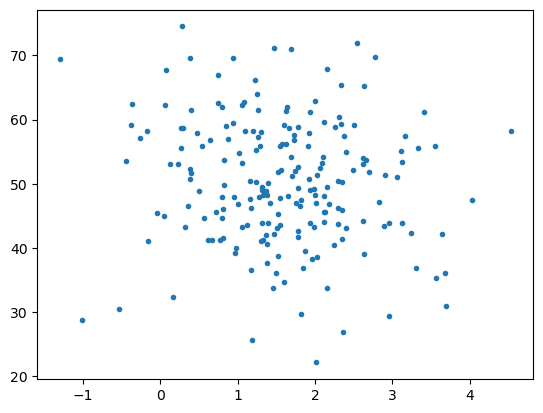

In [16]:
np.random.seed(1) # this is for comparison between different methods

#mu, sigma = [1.5, 5], [0, 0] # no sigmas
#mu, sigma = [1.5, 50], [0, 2] # y sigmas
mu, sigma = [1.5, 50], [1, 10] # different sigmas
#mu, sigma = [1.5, 50], [1, 1] # same sigmas
#mu, sigma = [1.5, 1.5], [10.1, 50.1]
#mu, sigma = [1.5, 50.1], [10.1, 10.1] # uncomment to try this
N = 200
mus = np.ones((N,1))*mu
#print (mus.shape)
sigmas = np.ones((N,1))*sigma  #print('mu=\n',mus,'\nsigma=\n',sigmas)

x, y = np.random.normal(mus,sigmas).T # T is for transpose
print (x.shape, y.shape)
plt.plot(x,y,'.')

data =np.vstack((x,y)).T
df = pd.DataFrame(data)
df.head()

#print(x, y)

### 1.3 Adding Gaussian Noise to Data
Generating a set of 5 pairs of normally distributed numbers each with different mu and sigma. This assumes that we have the data and we need to add noise to it in terms of the sigmas

,0,1
0,-1.306534,30.152761
1,40.367232,52.465798
2,58.731429,50.259393
3,60.715067,52.509493
4,80.451616,72.208349


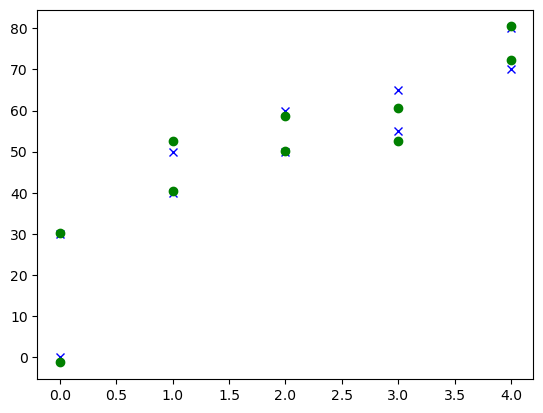

In [17]:
data = np.array([0,30, 40,50, 60,50, 65,55, 80,70]).reshape(5,2) #  these points are treated as mus
noise = np.array([1,2, 1,2, 3,3, 2,3, 1,2]).reshape(5,2)

noisy_data  = np.random.normal(data,noise) # note that we are adding noise along both x and y axes

plt.plot(data,'xb')
plt.plot(noisy_data,'og')

df = pd.DataFrame(noisy_data)
df

### 1.4 Adding a uniform Gaussian noise

,0,1
0,-0.281736,38.225422
1,41.760249,49.757390
2,57.586497,42.889734
3,64.222141,59.463364
4,80.310272,61.623009


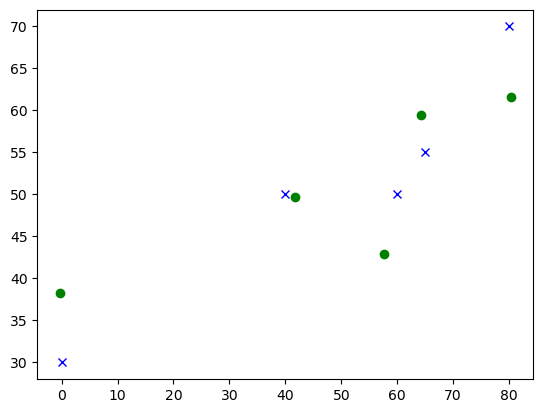

In [18]:
data = np.array([0,30, 40,50, 60,50, 65,55, 80,70]).reshape(5,2) #  these points are treated as mus
#noise = np.array([0,4]) # adding noise to y only
noise = np.array([1,4]) # adding noise to both x and y

noisy_x, noisy_y = np.random.normal(data,noise).T # note that we are adding noise along both x and y axes
plt.plot(data[:,0], data[:,1],'xb')
plt.plot(noisy_x, noisy_y ,'og')

data =np.vstack((noisy_x,noisy_y)).T
df = pd.DataFrame(data)
df

## 2. Generating multivariate normally distributed numbers (2D data)

In the following every row represents a data point in a 2D space

### 2.1 Generating a set of N normally distributed numbers with mean mu and std sigma, in 2D space

#### Method 1: Proper uses multivariate Gaussian

This method is the proper way of generating a normally distributed data points in 2D space. It uses multi-variate Gaussian instead of the univariate Gaussian.
Efficient way to generate a set of N pairs of normally distributed numbers with the same mu and sigma

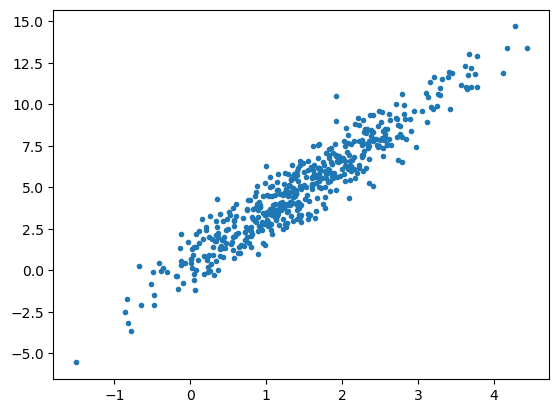

In [19]:
mu, cov = [1.5, 5], [[1, 3], [3, 10]]  # there is a strong correlation between the x and y axis
#mu, cov = [1.5, 5], [[1, 0], [0, 10]] # try this no correlation between the x and y axis

N = 500
x, y = np.random.multivariate_normal(mu,cov,N).T # T is for transpose
plt.plot(x,y,'.') 


Note the difference between the two distributions created in the 1.2 and 2.1 steps.

1.2 combines the x and y coordinates, but each was generated independently from the other, this is evident when we compare the y range of each set of data points plots.
More importantly there is no correlation that can be imposed in the first method.

2.1 is the proper way to generate a set of normally distributed in a multi-dimensional space.
Here we can impose a string correlation between x and y to generate a set of data points diagonally.

Even if we set the x and y not to have any correlation, the data in the first method is generated independently and will not be spread around one mean rather it will spread around two means independently. On the other hand the second method generates a set of data points that are circular around the mean.

Note that the data is distributed around a mean with strong correlation, in the next section we will show how to generate a data from different curves and add noise to them including a straight line. The data above is coming from an exponential family (the Gaussian) with a strong correlation between the two axes.

Dealing with Two Synthetic dataset of two classes one Gaussian and one random

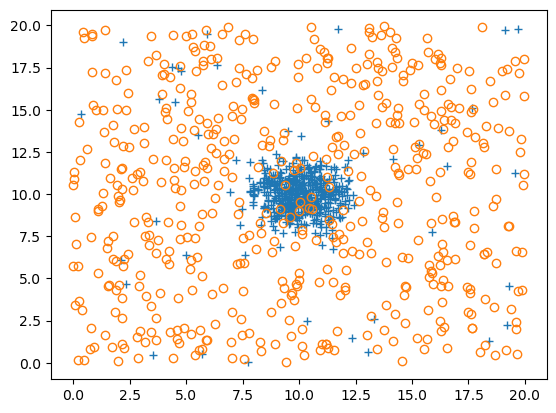

In [20]:
import os

# Parameters
mu, cov = [10, 10], [[1, 0], [0, 1]]
filt = 10  # 10%
N1 = int(5000 * filt / 100)
N2 = int(400 * filt / 100)
N3 = int(5400 * filt / 100)

# Generate data
GaussX, GaussY = np.random.multivariate_normal(mu, cov, N1).T
NoiseX, NoiseY = np.random.random((2, N2)) * 20

NoiseyGaussX, NoiseyGaussY = np.concatenate((GaussX, NoiseX)), np.concatenate((GaussY, NoiseY))
UniformX, UniformY = np.random.random((2, N3)) * 20

# Plot data
plt.plot(NoiseyGaussX, NoiseyGaussY, '+')
plt.plot(UniformX, UniformY, 'o', mfc='none')

# Add labels and combine data
dataC1 = np.vstack((NoiseyGaussX, NoiseyGaussY, np.zeros((N1 + N2)))).T  # Labels = 0
dataC2 = np.vstack((UniformX, UniformY, np.ones((N3)))).T  # Labels = 1

data = np.concatenate((dataC1, dataC2))

# Create DataFrame
df = pd.DataFrame(data, columns=['x1', 'x2', 'Class'])

# Ensure the 'datasets' directory exists
os.makedirs('datasets', exist_ok=True)

# Save to CSV
df.to_csv(f'datasets/GaussNoiseC1C2_{filt}perc.csv', index=False)

#--------------these are not needed we will plot the boundaries properly using the sklearn built in libraries--------
# y1, y2 = 13, 7.5
# x1, x2 = 13, 7.5

# x = np.linspace(y1, y2, num = N) 
# y = np.linspace(0, 20, num = N)

# plt.plot(x, np.ones(len(x))*y1) 
# plt.plot(x, np.ones(len(x))*y2) 

# plt.plot(np.ones(len(y))*x1, y) 
# plt.plot(np.ones(len(y))*x2, y)

# plt.savefig('DecisionBoundary.png', bbox_inches='tight')


### 2.2 Generating data from a curve with noise

#### 2.2.1 Generating Data from a straight line

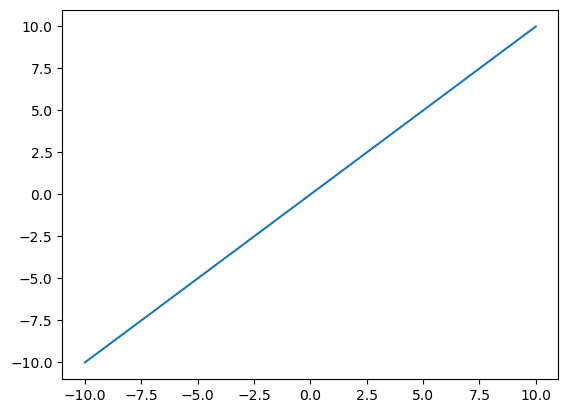

In [21]:
x = np.linspace(-10, 10, num = 100) # this sampling uniformly from the x axis
y = x 
plt.plot(x,y)

The slop of the line is 2, however the figure gives the impression that the slop is 1.
This is because the y axis is not aligned with the x axis, below we set the limits so that the slop of the line is clearer

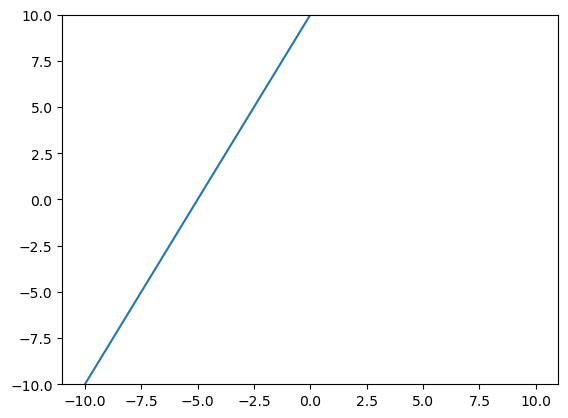

In [22]:
xmin,xmax = -10, 10
ymin,ymax = -10, 10
N = 100

x = np.linspace(xmin, xmax, num = N) # this sampling unifromally from the x axis
y = x*2 + 10

ax = plt.axes()
ax.set_ylim(ymin,ymax)
ax.plot(x,y)

Below we add noise to y only

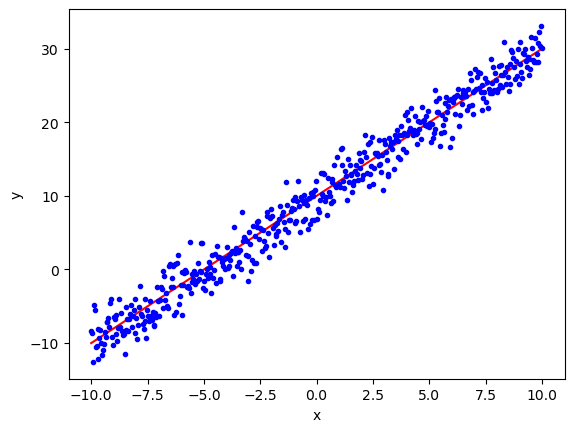

In [23]:
# Define parameters
xmin, xmax = -10, 10
ymin, ymax = -10, 10
N = 500

# Generate data
x = np.linspace(xmin, xmax, num=N)  # Uniform sampling from the x-axis
y = x * 2 + 10

# Plot straight line
ax = plt.axes()
ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Add noise to the data
noise = 2
noisy_y = np.random.normal(y, noise)
plt.plot(x, noisy_y, '.b')

# Save data to CSV
data = np.vstack((x, noisy_y)).T
df = pd.DataFrame(data, columns=['x', 'y'])

# Ensure the directories exist
os.makedirs('datasets', exist_ok=True)
os.makedirs('figures', exist_ok=True)

# Save CSV and plot
df.to_csv(f'datasets/StraightLineNoise{N}.csv', index=False)
plt.savefig(f'figures/LinearModelFit{N}.png')

# Display the plot
plt.show()

Below we add noise to an ellipse, note that the variation is reduced around the ends of the ellipse ‎because we are adding the noise to the y axis only.

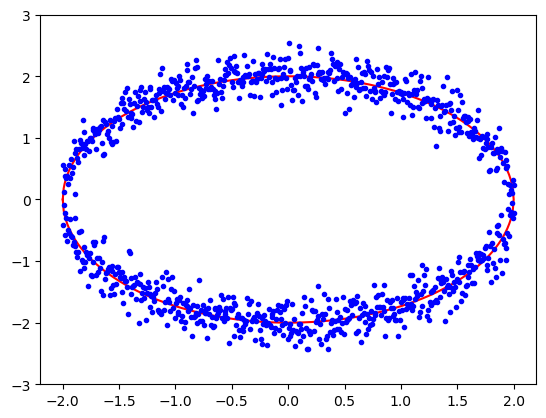

In [24]:
xmin,xmax = -2, 2
ymin,ymax = -3, 3
N = 500

x = np.linspace(xmin, xmax, num = N) 
y = -np.sqrt(-x**2 + 4) # remove the - sign and comment out the next line to get the upper half of the ellips

x, y = np.concatenate((x,-x),0), np.concatenate((y,-y),0) # comment this line if you want have of the ellips

ax = plt.axes()
ax.set_ylim(ymin,ymax)
ax.plot(x,y,'r')

noise = 0.2 #change this to 0.6 and see the effect

noisy_y = np.random.normal(y,noise)
plt.plot(x, noisy_y,'.b')

data = np.vstack((x,noisy_y)).T
df = pd.DataFrame(data)
plt.savefig('figures/ringData'+str(N)+'.png')
#df.head()
#df.to_csv('datasets/EllipticalGaussNoise.csv',index=False)

 try adding noise to both axes.

# Generating Data with Specific Decision Boundaries

In [25]:
# Auxiliary function for creating a csv and plotting the binary classes
def csvBinaryClass(X1,Y1,X2,Y2,name):
    
    dataC1 = np.vstack((X1,Y1,np.zeros(Y1.shape))).T
    dataC2 = np.vstack((X2,Y2,np.ones (Y2.shape))).T    
    data = np.concatenate((dataC1,dataC2))
    
    df = pd.DataFrame(data,columns=['f1','f2','Class'])    
    df.to_csv('datasets/'+name+ '.csv',index=False)    
    return df    

In [26]:
def pngBinaryClass(X1,Y1,X2,Y2,name):
    
    plt.plot(X1, Y1,'+b', label= 'Class1')
    plt.plot(X2, Y2,'or', label= 'Class2', fillstyle='none')    
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.legend()
    plt.savefig('figures/'+name+ '.png', bbox_inches='tight')
    

In [27]:
def csvPngBClass(X1,Y1,X2,Y2,name):
    pngBinaryClass(X1,Y1,X2,Y2,name)
    csvBinaryClass(X1,Y1,X2,Y2,name)

Generating Linear Decision Boundaries Data 

100 100


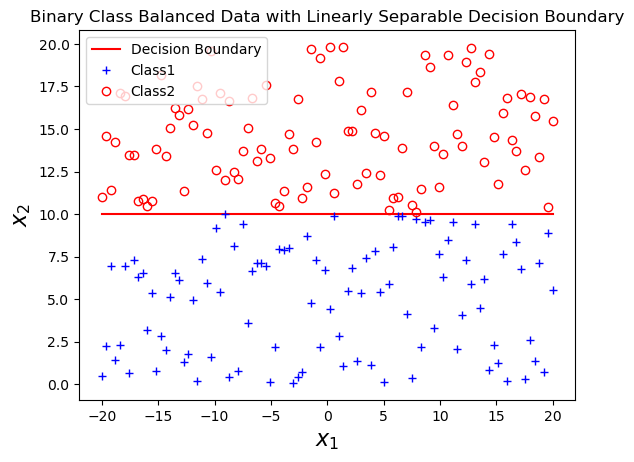

In [28]:
name = 'YLineDBoundaryC1C2'
x = np.linspace(-20, 20, num = 100) # this sampling uniformly from the x axis

# boundaries
y = 10 
b = y*np.ones(x.shape) # Y = 10 boundary

# generate data that satisfies the conditions
Y1 = np.random.random(x.shape)*y        # Y <  10 class since the interval of random is [0, 1)
Y2 = np.random.random(x.shape)*y + y    # Y >= 10 class

# plot classes and boundaries and save data
plt.plot(x, b, 'r', label='Decision Boundary')
plt.title('Binary Class Balanced Data with Linearly Separable Decision Boundary')

csvPngBClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)


print(len(Y1),len(Y2))

100 100


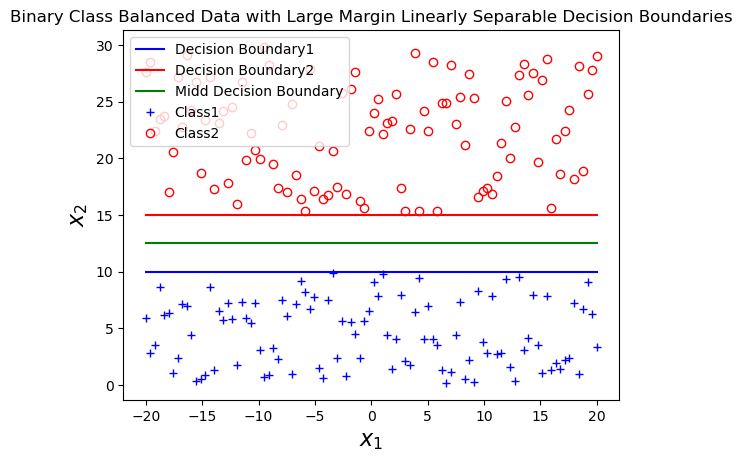

In [29]:
name = 'YYLineDBoundaryC1C2'

x = np.linspace(-20, 20, num = 100)

# boundaries
y1 = 10
y2 = 15

b1 = np.ones(x.shape)*y1             # ex. Y = 10 boundary
b2 = np.ones(x.shape)*y2             # ex. Y = 15 boundary
b3 = np.ones(x.shape)*(y2-y1)*.5 +y1 # ex. Y = 12.5 boundary

# generate data that satisfies the conditions
Y1 = np.random.random(x.shape)*y1        # Y <  10 class
Y2 = np.random.random(x.shape)*y2 + y2   # Y >= 15 class

# plot classes and boundaries and save data
plt.plot(x,b1, 'b', label='Decision Boundary1')
plt.plot(x,b2, 'r', label='Decision Boundary2')
plt.plot(x,b3, 'g', label='Midd Decision Boundary') # uncomment to draw a boundary in the margin
plt.title('Binary Class Balanced Data with Large Margin Linearly Separable Decision Boundaries')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2))

100 200 imbalanced issue


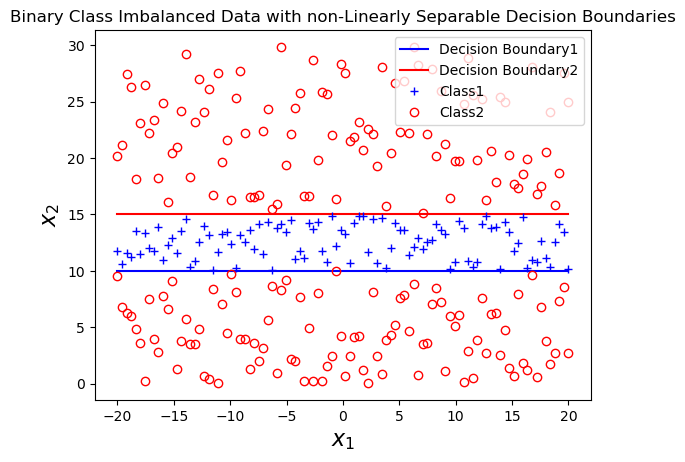

In [30]:
name = 'YYBoundaryImbalanced_C1_Sandwich_C2'
n  = 100
x1 = np.linspace(-20, 20, num = n)
x2 = np.array((x1,x1)).reshape(n*2,)
#x2 = np.linspace(-20, 20, num = n*2)

# boundaries
y1 = 10
y2 = 15

b1 = y1*np.ones(x1.shape)  # Y = 10 boundary
b2 = y2*np.ones(x1.shape)  # Y = 15 boundary

# generate data that satisfies the conditions
Y2Bot = np.random.random(x1.shape)*y1
Y2Top = np.random.random(x1.shape)*y2 + y2

Y1  = np.random.random(x1.shape)*(y2-y1) + y1      # y2 >  Y >= y1
Y2  = np.concatenate((Y2Bot,Y2Top))                # y2 <= Y <  y1

# plot classes and boundaries and save data
plt.plot(x1, b1, 'b', label='Decision Boundary1')
plt.plot(x1, b2, 'r', label='Decision Boundary2')
plt.title('Binary Class Imbalanced Data with non-Linearly Separable Decision Boundaries')

pngBinaryClass(x1,Y1,x2,Y2,name)
csvBinaryClass(x1,Y1,x2,Y2,name)

print(len(Y1),len(Y2),'imbalanced issue')

100 100 Balanced


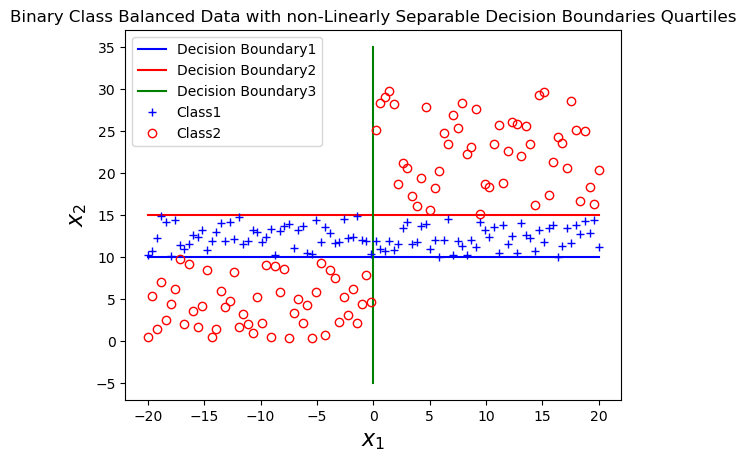

In [31]:
name ='YYXBoundary_C1_Sandwich_C2'

n  = 50
x  = np.linspace(-20, 20, num = 2*n) # this sampling uniformly from the x axis

# boundaries
y1 = 10
y2 = 15

b1 = y1*np.ones(x.shape)
b2 = y2*np.ones(x.shape)

# generate data that satisfies the conditions
Y2Bot = np.random.random(n)*y1
Y2Top = np.random.random(n)*y2 + y2

Y1 = np.random.random(2*n)*(y2-y1) + y1
Y2 = np.concatenate((Y2Bot,Y2Top))

# plot classes and boundaries and save data
plt.plot(x, b1, 'b', label='Decision Boundary1')
plt.plot(x, b2, 'r', label='Decision Boundary2')
plt.plot(x*0,x+15, 'g', label='Decision Boundary3')
plt.title('Binary Class Balanced Data with non-Linearly Separable Decision Boundaries Quartiles')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')

100 100 Balanced


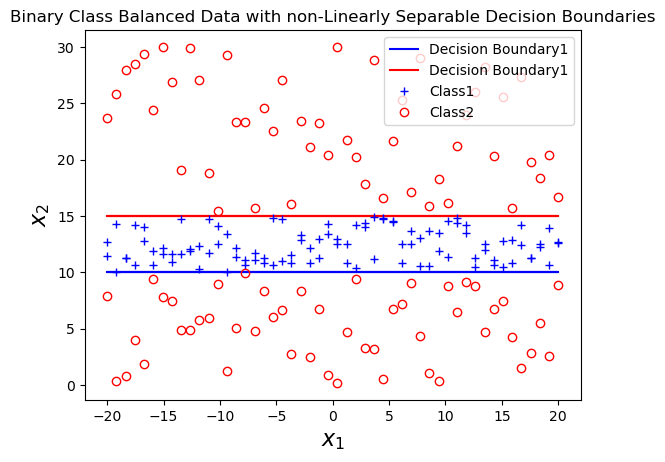

In [32]:
name = 'YYBoundary_C1_Sandwich_C2'

n  = 50
x0 = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis
x  = np.array((x0,x0)).reshape(n*2,)

# boundaries
y1 = 10
y2 = 15

b1 = y1*np.ones(x.shape)
b2 = y2*np.ones(x.shape)

# generate data that satisfies the conditions
Y2Bot = np.random.random(n)*y1
Y2Top = np.random.random(n)*y2 + y2

Y1 = np.random.random(2*n)*(y2-y1) + y1
Y2 = np.concatenate((Y2Bot,Y2Top))

# plot classes and boundaries and save data
plt.plot(x, b1, 'b',  label='Decision Boundary1')
plt.plot(x, b2, 'r',  label='Decision Boundary1')
plt.title('Binary Class Balanced Data with non-Linearly Separable Decision Boundaries')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')

100 100 Balanced


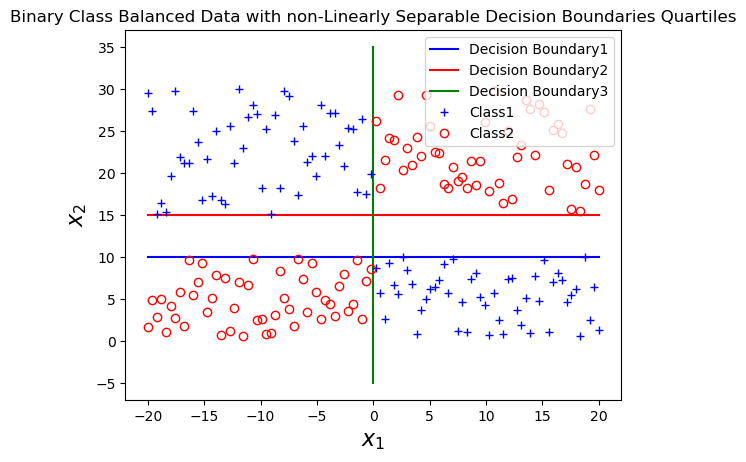

In [33]:
name ='YYXBoundary_Quad_C1_C2_C3'

n  = 50
x  = np.linspace(-20, 20, num = 2*n) # this sampling uniformly from the x axis

# boundaries
y1 = 10
y2 = 15

b1 = y1*np.ones(x.shape)
b2 = y2*np.ones(x.shape)

# generate data that satisfies the conditions

Y1Bot = np.random.random(n)*y2 + y2
Y1Top = np.random.random(n)*y1

Y2Bot = np.random.random(n)*y1
Y2Top = np.random.random(n)*y2 + y2

Y1 = np.concatenate((Y1Bot,Y1Top))
Y2 = np.concatenate((Y2Bot,Y2Top))

# plot classes and boundaries and save data
plt.plot(x, b1, 'b', label='Decision Boundary1')
plt.plot(x, b2, 'r', label='Decision Boundary2')
plt.plot(x*0,x+15, 'g', label='Decision Boundary3')
plt.title('Binary Class Balanced Data with non-Linearly Separable Decision Boundaries Quartiles')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')

100 100 Balanced


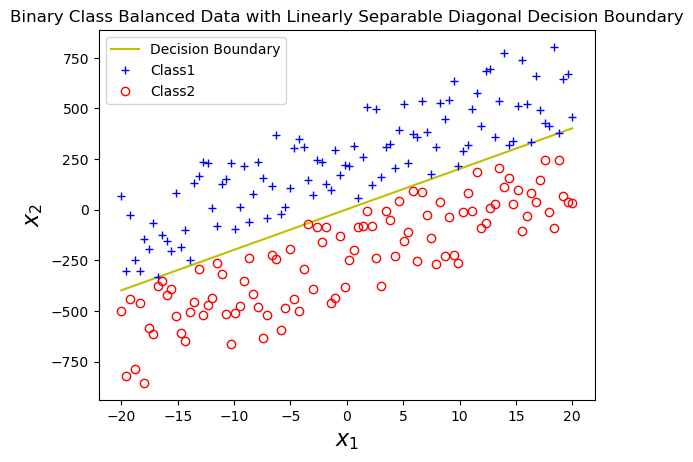

In [34]:
name = 'DiagonalDBoundaryC1C2'
n =100

x = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis
y = np.linspace(-20, 20, num = n) # this sampling uniformly from the y axis

# boundaries
b = 20*y + 2 # boundary

# generate data that satisfies the conditions
Y1 =  np.random.random(n)*500 + b
Y2 = -np.random.random(n)*500 + b

# plot classes and boundaries and save data
plt.plot(x, b, 'y', label='Decision Boundary')
plt.title('Binary Class Balanced Data with Linearly Separable Diagonal Decision Boundary')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')


100 100 Balanced


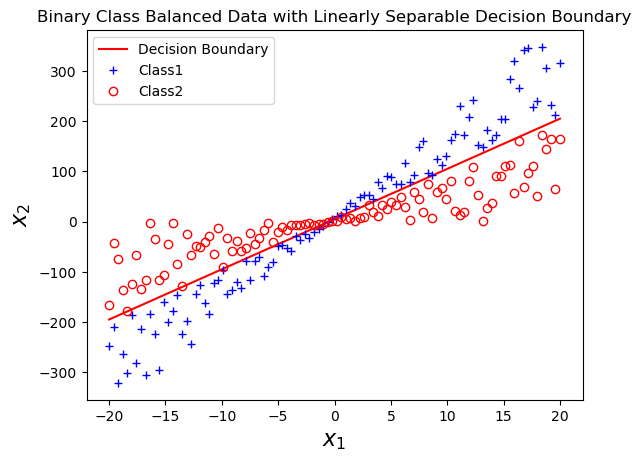

In [35]:
name = 'TwoDiagonalDBoundaryC1C2'
n =100

x = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis
y = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis

# boundaries
b = 10*y + 5 # boundary

# generate data that satisfies the conditions
Y1 =  np.random.random(n)*b + b
Y2 = -np.random.random(n)*b + b

# plot classes and boundaries and save data
plt.plot(x, b, 'r', label='Decision Boundary')
plt.title('Binary Class Balanced Data with Linearly Separable Decision Boundary')

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')


200 200 Balanced


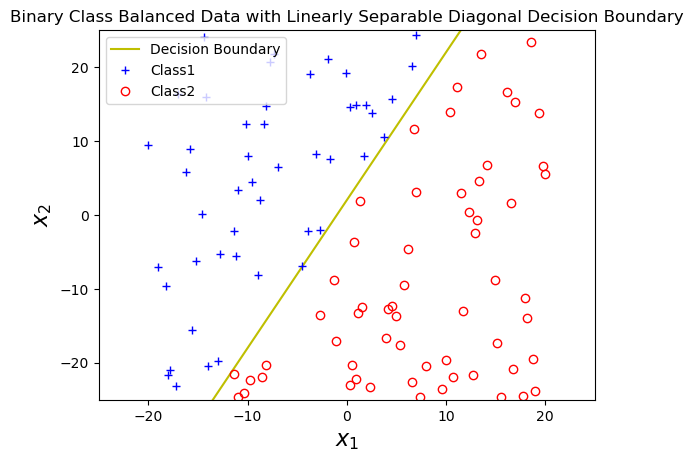

In [36]:
name = 'DiagonalDBoundaryC1C2'
n =200

x = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis
y = np.linspace(-20, 20, num = n) # this sampling uniformly from the x axis

# boundaries
b = 2*y + 2 # boundary


# generate data that satisfies the conditions
Y1 =  np.random.random(n)*100 + b
Y2 = -np.random.random(n)*100 + b

# plot classes and boundaries and save data
plt.plot(x, b, 'y', label='Decision Boundary')
plt.title('Binary Class Balanced Data with Linearly Separable Diagonal Decision Boundary')

plt.xlim([-25, 25])
plt.ylim([-25, 25])

pngBinaryClass(x,Y1,x,Y2,name)
csvBinaryClass(x,Y1,x,Y2,name)

print(len(Y1),len(Y2),'Balanced')


# Adding random or normal noise to any funciton best code

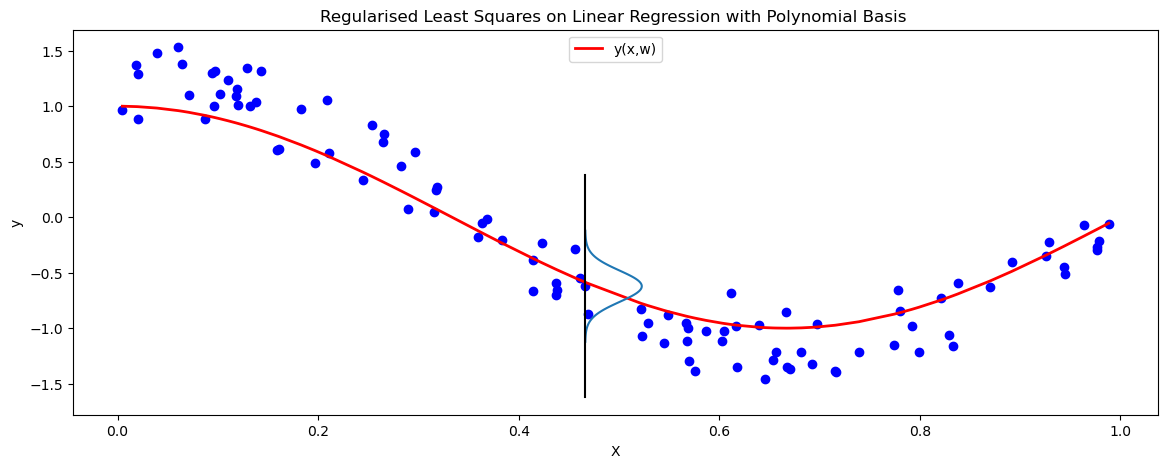

In [37]:
def cos(X):
    return np.cos(1.5 * np.pi * X)

def Gauss(X, mu, var):
    return np.exp(-np.square(X-mu)/2*var)/(np.sqrt(2*np.pi*var))

np.random.seed(0)

n = 100

X = np.sort(np.random.rand(n))
#y = cos(X) + np.random.randn(n) * 0.1     # adding random noise to y
y = cos(X) + np.random.normal(cos(X))*0.2  # adding normal noise to y


plt.figure(figsize=(14, 5))
plt.plot(X, cos(X), '-r', label='y(x,w)', linewidth=2)
plt.scatter(X,y, c='b')

x = np.linspace(-0.5, 0.5, num = n) 
k = 49
x1 = X[k]
y1 = y[k]
#y1 = cos(x1)

plt.plot(Gauss(x,0,50)+x1,x+y1)
plt.plot(x1*np.ones(n),np.linspace(y1-1, y1+1, num = n),'k' )

plt.title('Regularised Least Squares on Linear Regression with Polynomial Basis ')

# plt.xlim(0, 2)
# plt.ylim((0, 1.6))
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.savefig('figures/LinearModlGaussianNoise.png')